In [1]:
using ToeplitzMatrices, LinearAlgebra, SparseArrays
using Plots

In [2]:
    α = 1.
    ν = 1e-5
    nx = 32
    Δx = 2π/nx
    I = SymmetricToeplitz([1, zeros(nx-1)...])
    Δ = (1/Δx^2)Circulant([-2, 1, zeros(nx-3)..., 1])
    # ∇ = (1/Δx)Circulant([0, -1/2, zeros(nx-3)..., 1/2])
    ∇ = (1/Δx)Circulant([1, -1, zeros(nx-2)...])
    A = ν*Δ - α*∇;
    A = sparse(A)
    display(A[1:4, 1:4])

4×4 SparseMatrixCSC{Float64, Int64} with 10 stored entries:
 -5.09348   0.000259382    ⋅             ⋅ 
  5.09322  -5.09348       0.000259382    ⋅ 
   ⋅        5.09322      -5.09348       0.000259382
   ⋅         ⋅            5.09322      -5.09348

In [20]:
m = 4
Δt = Δx
# forward euler
# Φ = I + Δt*A;
# backward euler
Φ = inv(I - Δt*A)
Φ_m = inv(I - m*Δt*A);

In [21]:
# SDIRK2
a = √2/2
K1 = m*Δt*((I - (1-a) * m*Δt * A) \ (A))
K2 = m*Δt*((I - (1-a) * m*Δt * A) \ (A*(I + (2a-1)*K1)))
Φ_sdirk = I + 1/2*(K1 + K2);

In [22]:
# θSDIRK2
function θSDIRK2(m)
    a = √2√(m*(m-1))/2m
    θ = (m^2 -3m - √2√(m*(m-1)))/(2m^2 - 4m)
    K1 = m*Δt*((I - (1-a) * m*Δt * A) \ (A))
    K2 = m*Δt*((I - (1-a) * m*Δt * A) \ (A*(I + (2a-1)*K1)))
    Φ_θ = I + (θ)K1 + (1-θ)K2;
end
Φ_θ = θSDIRK2(m);

In [23]:
# θ extrapolation
p = 1
θ = 2^p * (m^p - 1) / (m^p * (2^p - 1))
Φ_θ_extrap = θ*inv(I - m/2*Δt*A)^2 + (1-θ)*inv(I - m*Δt*A);

In [24]:
# both?
p = 2
θ = 2^p * (m^p - 1) / (m^p * (2^p - 1))
Φ_both = θ*θSDIRK2(m÷2)^2 + (1-θ)*θSDIRK2(m);

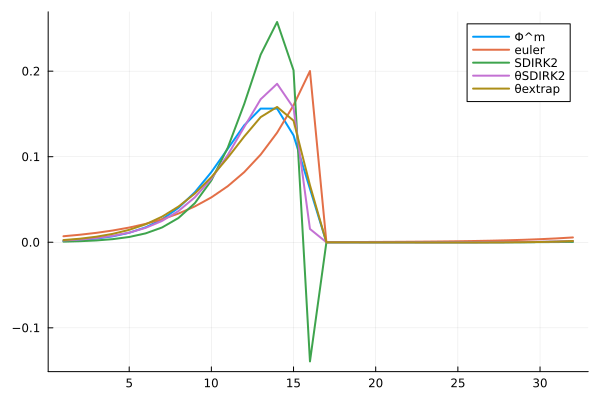

In [27]:
plot((Φ^m)[nx ÷ 2, :], label="Φ^m", linewidth=2)
plot!(Φ_m[nx ÷ 2, :], label="euler", linewidth=2)
plot!(Φ_sdirk[nx ÷ 2, :], label="SDIRK2", linewidth=2)
plot!(Φ_θ[nx ÷ 2, :], label="θSDIRK2", linewidth=2)
plot!(Φ_θ_extrap[nx ÷ 2, :], label="θextrap", linewidth=2)
# plot!(Φ_both[nx ÷ 2, :], label="θboth", linewidth=2)

In [9]:
Φ_both

32×32 Matrix{Float64}:
  0.0651948    0.00451346   0.00572298  …  -0.021391     0.0172369
  0.0172369    0.0651948    0.00451346     -0.0390968   -0.021391
 -0.021391     0.0172369    0.0651948      -0.0375144   -0.0390968
 -0.0390968   -0.021391     0.0172369      -0.0227642   -0.0375144
 -0.0375144   -0.0390968   -0.021391       -0.00132928  -0.0227642
 -0.0227642   -0.0375144   -0.0390968   …   0.0215937   -0.00132928
 -0.00132928  -0.0227642   -0.0375144       0.0425005    0.0215937
  0.0215937   -0.00132928  -0.0227642       0.0594241    0.0425005
  0.0425005    0.0215937   -0.00132928      0.07158      0.0594241
  0.0594241    0.0425005    0.0215937       0.0789898    0.07158
  ⋮                                     ⋱   ⋮           
  0.0246593    0.0294486    0.0348455       0.0168616    0.0204731
  0.0204731    0.0246593    0.0294486       0.0137817    0.0168616
  0.0168616    0.0204731    0.0246593   …   0.0111819    0.0137817
  0.0137817    0.0168616    0.0204731       0.00900